In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#Get the Data
#Set index_col=0 to use the first column as the index.
df = pd.read_csv("Classified Data",index_col=0)

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df.drop('TARGET CLASS',axis=1)
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_features = scaler.transform(X)

In [7]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
y=df['TARGET CLASS']

## Train Test Split

In [8]:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[147  14]
 [ 12 127]]


             precision    recall  f1-score   support

          0       0.92      0.91      0.92       161
          1       0.90      0.91      0.91       139

avg / total       0.91      0.91      0.91       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

Text(0,0.5,u'Error Rate')

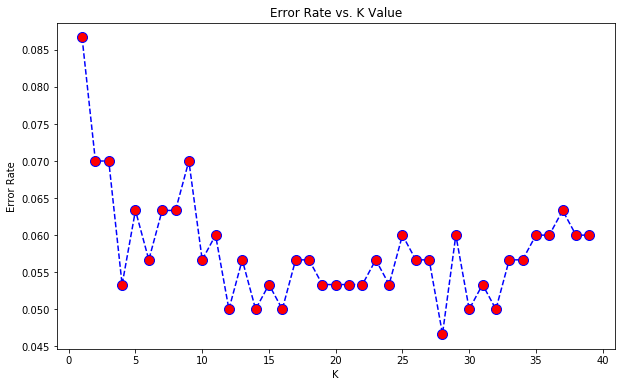

In [12]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')   

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [101]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[132  11]
 [  5 152]]


             precision    recall  f1-score   support

          0       0.96      0.92      0.94       143
          1       0.93      0.97      0.95       157

avg / total       0.95      0.95      0.95       300



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!